In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
from scipy.stats import zscore
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
path_to_umap_coords = "./../z2_combined_batch_corrected_data_mammary/umap_data_combined.txt"
df_umap = pd.read_csv(path_to_umap_coords,sep="\t",index_col=0)

In [3]:
path_to_metadata = "./../z2_combined_batch_corrected_data_mammary/meta_data_combined.txt"
df_metadata = pd.read_csv(path_to_metadata,sep="\t",index_col=0)
df_metadata["sample_id"] = [int(i[-1])-2 for i in df_metadata.index]

In [4]:
path_to_batch_corrected_data = "./../z2_combined_batch_corrected_data_mammary/top_2000_scaled_data_both_mammary.txt"
df_corrected_scores = pd.read_csv(path_to_batch_corrected_data,sep="\t",index_col=0).T

In [5]:
df_concat = pd.concat([df_corrected_scores,df_umap,df_metadata],axis=1)

In [6]:
df_metadata

,orig.ident,nCount_RNA,nFeature_RNA,biotype,integrated_snn_res.0.8,seurat_clusters,sample_id
Mammary1_AAACCCACACAACGTT-2,Mammary1,26074,4937,Mammary1,0,0,0
Mammary1_AAACCCACACAGTATC-2,Mammary1,17410,3821,Mammary1,1,1,0
Mammary1_AAACCCACACGCACCA-2,Mammary1,7178,2299,Mammary1,2,2,0
Mammary1_AAACCCACAGCGTGAA-2,Mammary1,3904,1341,Mammary1,9,9,0
Mammary1_AAACCCACATCTGGGC-2,Mammary1,1425,719,Mammary1,4,4,0
...,...,...,...,...,...,...,...
Mammary2_TTTGTTGGTCGAAACG-3,Mammary2,9808,2731,Mammary2,1,1,1
Mammary2_TTTGTTGGTCTAACGT-3,Mammary2,7758,2588,Mammary2,1,1,1
Mammary2_TTTGTTGGTGAATGTA-3,Mammary2,5750,1995,Mammary2,2,2,1
Mammary2_TTTGTTGTCAAGTCGT-3,Mammary2,3423,1198,Mammary2,4,4,1


c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


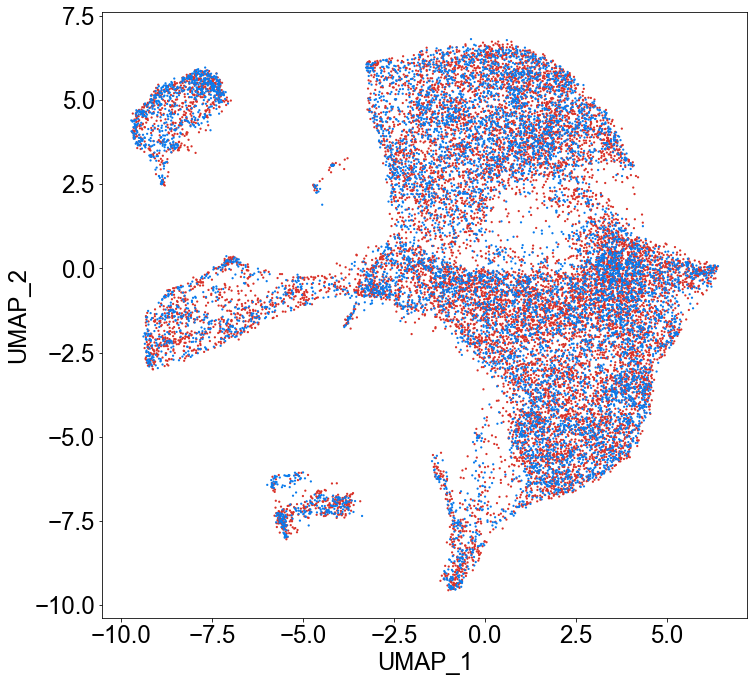

In [58]:
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (11,10)
sns.scatterplot(df_concat["UMAP_1"],df_concat["UMAP_2"],hue=df_concat["biotype"],linewidth=0,s=5,palette=['#D93128','#097BED'])
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig("Mammary_Biotype_comparision_scatter.png",dpi=1000)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


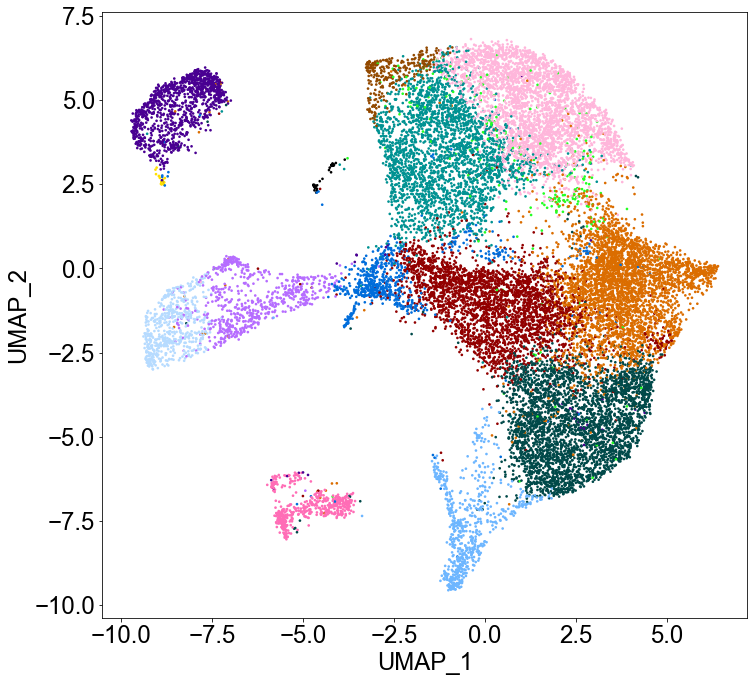

In [60]:
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (11,10)
sns.scatterplot(df_concat["UMAP_1"],df_concat["UMAP_2"],hue=df_concat["integrated_snn_res.0.8"],linewidth=0,s=7,palette=["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#24ff24","#000000","#ffdf00"])
plt.legend('',frameon=False)
plt.tight_layout()
plt.savefig("Mammary_Seurat_clustering_scatter.png",dpi=1000)

In [23]:
for i in ["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#24ff24","#000000","#ffdf00"]:
    print(i)
for i in ["Mesenchyme-1","Mammary Mesenchyme-1","Mammary Mesenchyme-2","Mesenchyme-2","Mammary Mesenchyme-3","Neuronal cells-1","Mitochondria-specific","Myocytes-1","Adipocytes","Myocytes-2","Dividing cells","Chondrocytes-1","Chondrocytes-2","Mammary epithelium","Neuronal cells-2"]:
    print(i)

#db6d00
#004949
#ffb6db
#920000
#009292
#490092
#006ddb
#b66dff
#6db6ff
#b6dbff
#ff6db6
#924900
#24ff24
#000000
#ffdf00
Mesenchyme-1
Mammary Mesenchyme-1
Mammary Mesenchyme-2
Mesenchyme-2
Mammary Mesenchyme-3
Neuronal cells-1
Mitochondria-specific
Myocytes-1
Adipocytes
Myocytes-2
Dividing cells
Chondrocytes-1
Chondrocytes-2
Mammary epithelium
Neuronal cells-2


In [6]:
path_to_metadata_combined = "./../z1_combined_batch_corrected_data/meta_data_combined.txt"
df_metadata_combined = pd.read_csv(path_to_metadata_combined,sep="\t",index_col=0)
df_metadata_combined["sample_id"] = [int(i[-1])-2 for i in df_metadata_combined.index]

In [7]:
x = [i.replace('Mammary2','Mammary'+str(int(i[-1])-1)) for i in df_metadata_combined.index]

In [8]:
df_metadata_combined.index = x

In [9]:
common_cells = list(set(df_metadata.index).intersection(set(df_metadata.index)))
df_metadata_combined = df_metadata_combined.T[common_cells]
df_metadata_combined

,Mammary1_TTCTGTACAAAGGAGA-2,Mammary2_CCCGAAGAGGTTGAGC-3,Mammary1_AGGATAATCCATCCGT-2,Mammary1_CGGTCAGAGGCTCTCG-2,Mammary1_GCAGTTAGTGGTCTCG-2,Mammary2_CAGTGCGAGCGGATCA-3,Mammary2_TTCAGGATCCGTATAG-3,Mammary2_GTCTGTCGTCATAAAG-3,Mammary1_TTCCTTCTCACAGAGG-2,Mammary2_AGTTAGCAGCTTCGTA-3,...,Mammary1_TCCCAGTTCTAGAACC-2,Mammary2_AGGAATATCTGTAACG-3,Mammary1_AACCATGAGTAAAGCT-2,Mammary1_TCTCAGCGTGATAGTA-2,Mammary1_TCCGTGTGTATCGTTG-2,Mammary2_CTGGACGTCTTGCGCT-3,Mammary2_CTGCAGGGTGGTAACG-3,Mammary1_GTGATGTGTATGATCC-2,Mammary1_ATGATCGTCAACTTTC-2,Mammary1_TCACTCGGTTGCTAGT-2
orig.ident,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,...,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2
nCount_RNA,4959,3789,7110,7642,6623,3616,4266,5786,1074,4231,...,8516,11564,20515,2397,7074,18870,5856,8228,6491,4411
nFeature_RNA,1862,1920,2152,2115,1826,1360,1686,2242,587,1643,...,2868,3076,4698,1113,2291,4138,2225,2539,1927,1918
biotype,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,...,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2,Mammary2
integrated_snn_res.0.5,11,0,11,1,4,4,1,2,0,4,...,0,2,2,7,2,2,2,2,11,7
seurat_clusters,15,1,15,7,0,0,5,3,1,0,...,1,4,3,11,4,3,3,3,15,11
integrated_snn_res.0.8,15,1,15,7,0,0,5,3,1,0,...,1,4,3,11,4,3,3,3,15,11
sample_id,0,1,0,0,0,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0


In [10]:
new_concat = pd.concat([df_umap,df_metadata,df_metadata_combined.T["integrated_snn_res.0.5"]],axis=1)
new_concat

,UMAP_1,UMAP_2,orig.ident,nCount_RNA,nFeature_RNA,biotype,integrated_snn_res.0.8,seurat_clusters,sample_id,integrated_snn_res.0.5
Mammary1_AAACCCACACAACGTT-2,3.832512,0.708295,Mammary1,26074,4937,Mammary1,0,0,0,1
Mammary1_AAACCCACACAGTATC-2,1.721142,-3.171704,Mammary1,17410,3821,Mammary1,1,1,0,4
Mammary1_AAACCCACACGCACCA-2,3.332832,4.712473,Mammary1,7178,2299,Mammary1,2,2,0,1
Mammary1_AAACCCACAGCGTGAA-2,-8.399585,-1.358413,Mammary1,3904,1341,Mammary1,9,9,0,8
Mammary1_AAACCCACATCTGGGC-2,-2.597476,3.930704,Mammary1,1425,719,Mammary1,4,4,0,1
...,...,...,...,...,...,...,...,...,...,...
Mammary2_TTTGTTGGTCGAAACG-3,2.299503,1.610757,Mammary2,9808,2731,Mammary2,1,1,1,4
Mammary2_TTTGTTGGTCTAACGT-3,3.886269,-4.474933,Mammary2,7758,2588,Mammary2,1,1,1,4
Mammary2_TTTGTTGGTGAATGTA-3,1.710333,3.214773,Mammary2,5750,1995,Mammary2,2,2,1,1
Mammary2_TTTGTTGTCAAGTCGT-3,-1.442866,2.381826,Mammary2,3423,1198,Mammary2,4,4,1,1


In [209]:
new_concat["integrated_snn_res.0.5"].unique()

array([1, 4, 8, 7, 2, 0, 6, 11, 5, 10, 9, 12, 3, 13], dtype=object)

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


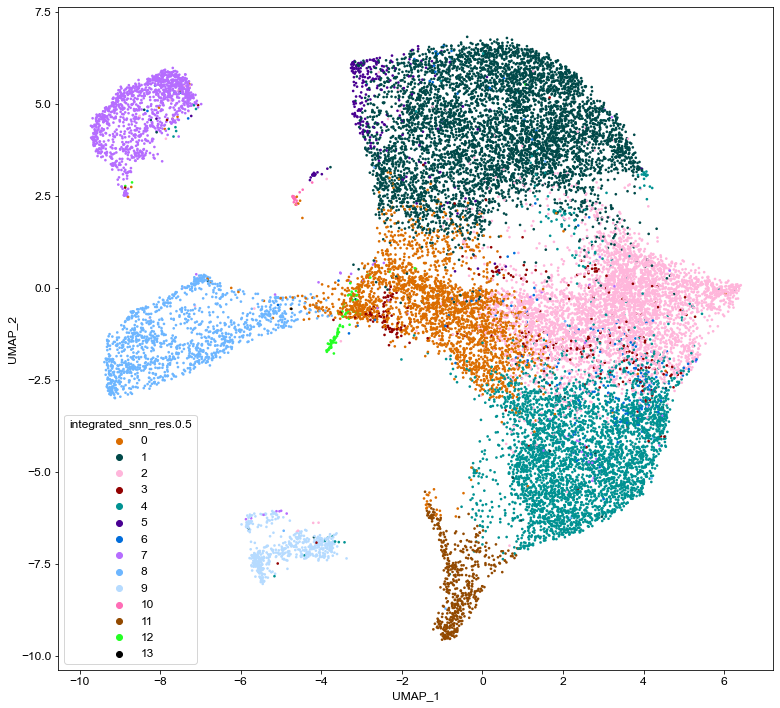

In [214]:
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (11,10)
sns.scatterplot(new_concat["UMAP_1"],new_concat["UMAP_2"],hue=new_concat["integrated_snn_res.0.5"],linewidth=0,s=7,palette=["#db6d00","#004949","#ffb6db","#920000","#009292","#490092","#006ddb","#b66dff","#6db6ff","#b6dbff","#ff6db6","#924900","#24ff24","#000000"])
#plt.legend('',frameon=False)
plt.tight_layout()

In [9]:
d_path = {}
path_to_signature = "./gene_signatures/signatures.gmt"
reference_genes = set(list(df_corrected_scores.columns))
with open(path_to_signature) as f:
    for line in f:
        a = line[:-1].split("\t")
        path_name = a[0]
        genes = a[2:]
        genes = [g.capitalize() for g in genes]
        genes = list(set(genes).intersection(reference_genes))
        if len(genes) > 5:
            d_path[path_name] = genes
        
d_path_scores = {}
for path in d_path:
    subset = df_concat[d_path[path]]
    subset = subset.apply(zscore)
    scores = subset.mean(axis=1)
    d_path_scores[path] = scores

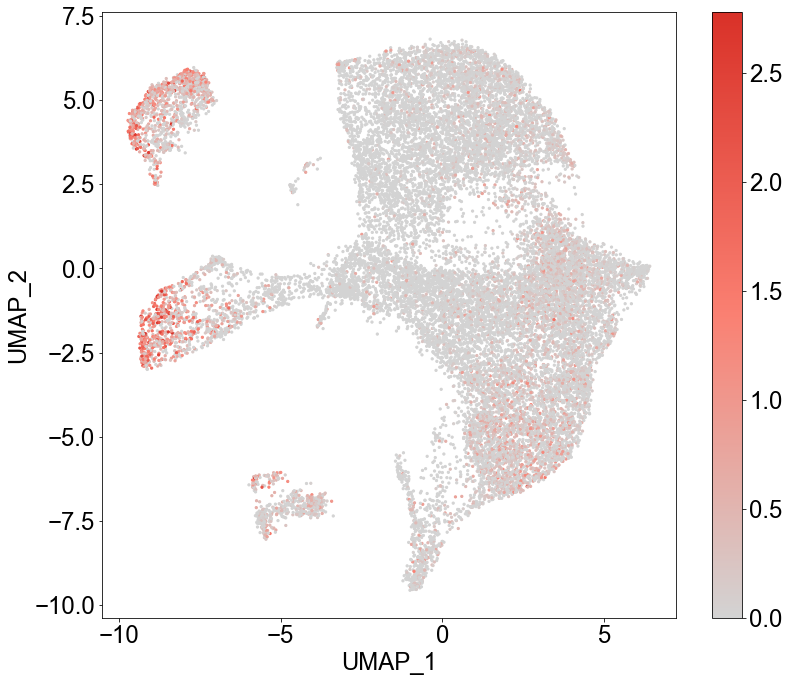

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


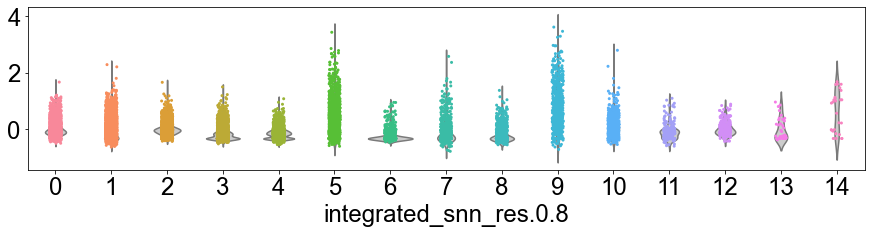

In [12]:
color_by = d_path_scores["reg_PGR"]

plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (12,10)

cvals  = [0,max(color_by)/2,max(color_by)]
colors = ["#D3D3D3","salmon","#D93128"]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.scatter(df_concat["UMAP_1"],df_concat["UMAP_2"],c=color_by, cmap=cmap, norm=norm,s=5)
c = plt.colorbar()
plt.clim(0, np.percentile(color_by, 99.95))
plt.clim(0, np.percentile(color_by, 99.95))
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
#plt.title("SOX9 regulon")
plt.tight_layout()
#plt.xlim([-5,-3.5])
#plt.ylim([1.75,3.5])
#plt.savefig("SOX9_regulon_mammary.png",dpi=1000)
plt.show()
plt.close()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
#plt.axhline(y=1.5,color='black')
ax = sns.violinplot(df_concat["integrated_snn_res.0.8"],color_by,inner=None, color=".8")
sns.stripplot(df_concat["integrated_snn_res.0.8"],color_by,s = 3)
plt.show()
plt.close()

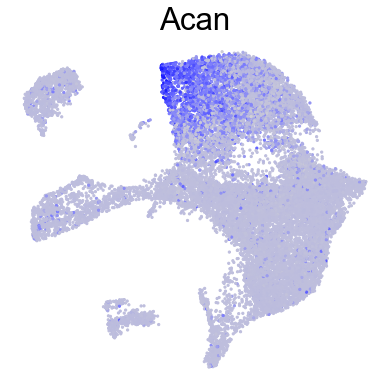

c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\csb_05\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


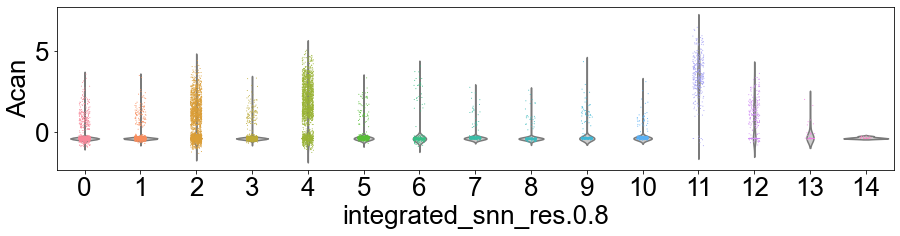

In [21]:
gene_of_int = "reg"
color_by = df_concat[gene_of_int] # Ngfr, Mlana, Krt6a, Nrxn1, Mki67, Adipoq, Myod1, Acan
plt.rcParams["font.size"] = 26
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (6,6)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

cvals  = [min(color_by),min(color_by) + (max(color_by)-min(color_by))/2,max(color_by)]
colors = ["#D3D3D3","salmon","#D93128"]
colors = ["#D3D3D3","#7879FF","#0000FF"] # blue

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

plt.scatter(df_concat["UMAP_1"],df_concat["UMAP_2"],c=color_by, cmap=cmap, norm=norm,s=5)
#c = plt.colorbar()
#plt.clim(0, np.percentile(color_by, 99.95))
#plt.xlabel("UMAP_1")
#plt.ylabel("UMAP_2")
#plt.title("Pgr Expression")
plt.tight_layout()
plt.axis('off')
plt.legend('',frameon=False)
plt.title(gene_of_int)
plt.tight_layout()
#plt.xlim([-5,-3.5])
#plt.ylim([1.75,3.5])
#plt.savefig("Acan Expression.png",dpi=1000)
plt.show()
plt.close()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
#plt.axhline(y=1.5,color='black')
ax = sns.violinplot(df_concat["integrated_snn_res.0.8"],color_by,inner=None, color=".8")
sns.stripplot(df_concat["integrated_snn_res.0.8"],color_by,s = 1)
plt.show()
plt.close()

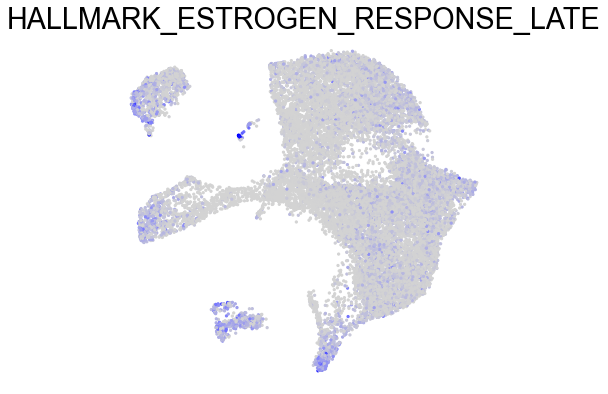

In [11]:
gene_of_int = "HALLMARK_ESTROGEN_RESPONSE_LATE"
color_by = d_path_scores[gene_of_int] # Ngfr, Mlana, Krt6a, Nrxn1, Mki67, Adipoq, Myod1, Acan
plt.rcParams["font.size"] = 24
plt.rcParams["font.family"] = 'Arial'
plt.rcParams["figure.figsize"] = (6,6) # 7,6 for zoomed in
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

cvals  = [min(color_by),min(color_by) + (max(color_by)-min(color_by))/2,max(color_by)]
colors = ["#D3D3D3","salmon","#D93128"]
colors = ["#D3D3D3","#7879FF","#0000FF"] # blue

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

d = plt.scatter(df_concat["UMAP_1"],df_concat["UMAP_2"],c=color_by, cmap=cmap, norm=norm,s=5) # 60 for zoomed in 
#c = plt.colorbar()
plt.clim(0, np.percentile(color_by, 99.95))
#plt.xlabel("UMAP_1")
#plt.ylabel("UMAP_2")
#plt.title("Pgr Expression")
#plt.xticks(color='w')
#plt.yticks(color='w')
plt.axis('off')
plt.legend('',frameon=False)
plt.title(gene_of_int)
plt.tight_layout()
#plt.xlim([-5,-3.5])
#plt.ylim([1.75,3.5])
plt.tight_layout()
plt.savefig("./new_plots/mammary_only/"+gene_of_int+" Expression.png",dpi=1000)
plt.show()
plt.close()
